Text(0, 0.5, '타깃')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


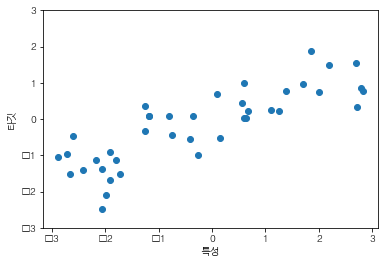

In [3]:
import mglearn
from matplotlib import pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family=font_name)

X,Y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, Y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X,Y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [6]:
print("테스트 세트 예측 : \n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, Y_test)))

테스트 세트 예측 : 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2 : 0.83


In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X,Y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size=0.4)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [8]:
print("테스트 세트 예측 : \n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, Y_test)))

테스트 세트 예측 : 
[-0.05396539  0.42989718  0.82597372 -1.89415682 -1.04203645 -1.63113382
  0.16931864  0.91241374 -0.44561282 -1.04203645 -0.49284968  0.82597372
 -1.04203645  0.41271285 -0.44561282  0.42989718]
테스트 세트 R^2 : 0.68


X_train shape : (24, 1) X_test shape : (16, 1)
X_train shape : (24, 1) X_test shape : (16, 1)
X_train shape : (24, 1) X_test shape : (16, 1)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


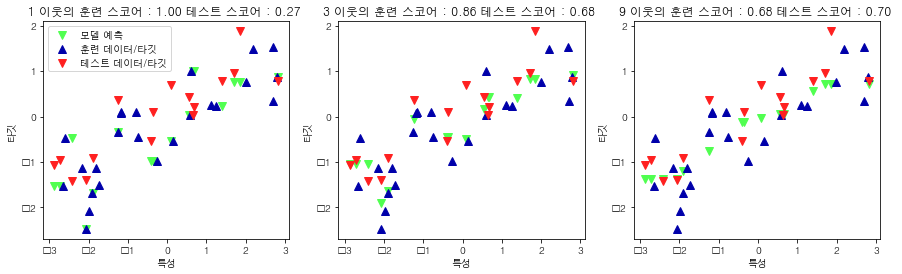

In [9]:
import mglearn
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family=font_name)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for n_neighbors, ax in zip([1,3,9], axes) : 
    # 1, 3, 9 이웃을 이용해서 예측을 실시한다.
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    print("X_train shape : {}".format(X_train.shape), "X_test shape : {}".format(X_test.shape))
    # 훈련 시작
    reg.fit(X_train, Y_train)
    ax.plot(X_test, reg.predict(X_test),'v', c=mglearn.cm3(2), markersize=8)
    ax.plot(X_train, Y_train, '^', c=mglearn.cm3(0), markersize=8)
    ax.plot(X_test, Y_test, 'v', c=mglearn.cm3(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어 : {:.2f} 테스트 스코어 : {:.2f} ".
                format(n_neighbors, reg.score(X_train, Y_train), reg.score(X_test, Y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

In [10]:
import numpy as np

# 기울기 a와 y 절편 b
ab = [3, 76]

# x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b에 a와 b 값을 대입하여 결과를 출력하는 함수
def predict(x):
    return ab[0]*x + ab[1]

# RMSE 함수
def rmse(p, a):
    return np.sqrt(((p - a) ** 2).mean())

# RMSE 함수를 각 y 값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result,y):
    return rmse(np.array(predict_result), np.array(y))

# 예측 값이 들어갈 빈 리스트
predict_result = []

# 모든 x 값을 한 번씩 대입하여
for i in range(len(x)):
    # predict_result 리스트를 완성한다.
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" % (x[i], y[i],
    predict(x[i])))
    
# 최종 RMSE 출력
print("rmse 최종값: " + str(rmse_val(predict_result,y)))

공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100
rmse 최종값: 3.3166247903554


In [53]:
from sklearn.linear_model import LinearRegression
X,Y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

lr = LinearRegression().fit(X_train, Y_train)

print("테스트 세트 예측 : \n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, Y_test)))

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

테스트 세트 예측 : 
[-0.51936987 -1.37178643 -0.76885025  0.42124081 -1.12951648  0.04547289
  0.72276155 -0.02782293  0.72276155 -1.12951648 -0.76885025  0.72276155
 -1.37178643  0.04547289  0.72276155]
테스트 세트 R^2 : 0.74
lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


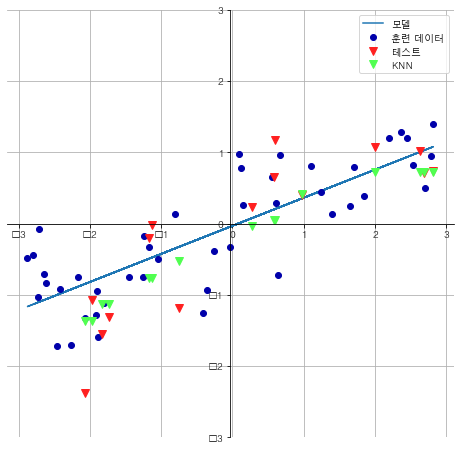

In [55]:
plt.figure(figsize=(8, 8))
plt.plot(X_train, lr.predict(X_train))
plt.plot(X_train, Y_train, 'o', c=mglearn.cm2(0))
plt.plot(X_test, Y_test, 'v', c=mglearn.cm2(1), markersize=8)

# KNN 결과 출력
#1차원 특징이라서 정확률이 낮다. 샘플수가 커질수록 정확률이낮다. 데이터의 분포가 퍼져서
plt.plot(X_test, reg.predict(X_test),'v', c=mglearn.cm3(2),markersize=8)

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)

#ax.set_xlabel("Feature") 
#ax.set_ylabel("Target")
ax.legend(["모델", "훈련 데이터", "테스트", "KNN"], loc="best")
ax.grid(True)
ax.set_aspect('equal')

In [17]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()

print("boston.keys():\n", boston.keys())
print("boston.data : \n{}".format(boston['data'].shape))
print("boston 특성 이름 : \n", boston.feature_names)
print(boston['DESCR'] + "\n...")

df = pd.DataFrame(boston.data, columns = boston.feature_names)
print(df.head())

boston.keys():
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
boston.data : 
(506, 13)
boston 특성 이름 : 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
 

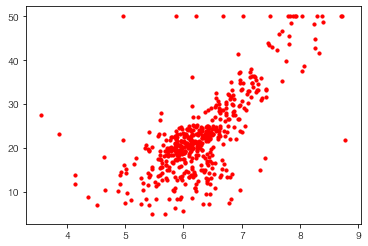

In [18]:
from matplotlib import pyplot as plt
plt.scatter(boston.data[:, 5], boston.target, color='r', s=10)

In [19]:
# 속상 하나로 선형회귀 분석
X = boston.data[:, 5]
print(X.shape)

# LinearRegression의 함수에 인자를 전달하기 위해서는
# 각 원소의 값이 담긴 2차원 배열을 (n,1)의 형태로 만들어야 한다. 
# atleast_2d 함수는 x 데이터를 (1,n)의 형태로 만들어준다.

X_1 = np.atleast_2d(X)
X_2 = np.transpose(X_1)
print(X_2.shape)
Y = boston.target

lr.fit(X_2, Y)

Y_predicted = lr.predict(X_2)

print("w[0] : %f b : %f" % (lr.coef_[0], lr.intercept_))

(506,)
(506, 1)
w[0] : 9.102109 b : -34.670621


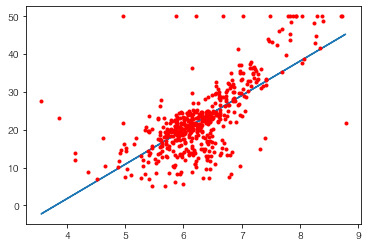

In [20]:
plt.plot(X_2, Y_predicted)
plt.plot(X_2, Y, 'o', color='r', markersize=3)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, random_state = 0)
print("X_train shape : {}".format(X_train.shape), "X_test shape : {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, Y_train)
print("훈련 세트 예측 : \n{}".format(lr.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lr.score(X_test, Y_test)))

X_train shape : (379, 13) X_test shape : (127, 13)
훈련 세트 예측 : 
0.7697699488741149
테스트 세트 R^2 : 0.64


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, random_state = 0)
print("X_train shape : {}".format(X_train.shape), "X_test shape : {}".format(X_test.shape))
knn = KNeighborsRegressor().fit(X_train, Y_train)
print("훈련 세트 예측 : \n{}".format(knn.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(knn.score(X_test, Y_test)))

X_train shape : (379, 13) X_test shape : (127, 13)
훈련 세트 예측 : 
0.7066272660046313
테스트 세트 R^2 : 0.46


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import mglearn

X, Y= mglearn.datasets.load_extended_boston()
print("X_train shape : {}".format(X.shape))
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0)
print("X_train shape : {}".format(X_train.shape), "X_test shape : {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, Y_train)

print("LR 훈련 세트 예측 : {:.2f}".format(lr.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lr.score(X_test, Y_test)))

knn = KNeighborsRegressor().fit(X_train, Y_train)
print("KNN 훈련 세트 예측 : {:.2f}".format(knn.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(knn.score(X_test, Y_test)))

X_train shape : (506, 104)
X_train shape : (379, 104) X_test shape : (127, 104)
LR 훈련 세트 예측 : 0.95
테스트 세트 R^2 : 0.61
KNN 훈련 세트 예측 : 0.83
테스트 세트 R^2 : 0.56


In [59]:
# 릿지 선형모델
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, Y_train)
print("Ridge 훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, Y_test)))

Ridge 훈련 세트 예측 : 0.89
테스트 세트 R^2 : 0.75


In [60]:
ridge = Ridge(alpha=10).fit(X_train, Y_train)
print("Ridge Alpha 10 훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, Y_test)))

Ridge Alpha 10 훈련 세트 예측 : 0.79
테스트 세트 R^2 : 0.64


In [62]:
ridge = Ridge(alpha=5).fit(X_train, Y_train)
print("Ridge Alpha 5 훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, Y_test)))

Ridge Alpha 5 훈련 세트 예측 : 0.82
테스트 세트 R^2 : 0.68


In [63]:
ridge = Ridge(alpha=1).fit(X_train, Y_train)
print("Ridge Alpha 1 훈련 세트 예측 : {:.2f}".format(ridge.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge.score(X_test, Y_test)))

Ridge Alpha 1 훈련 세트 예측 : 0.89
테스트 세트 R^2 : 0.75


In [77]:
ridge05 = Ridge(alpha=0.5).fit(X_train, Y_train)
print("Ridge Alpha 0.5 훈련 세트 예측 : {:.2f}".format(ridge05.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge05.score(X_test, Y_test)))

Ridge Alpha 0.5 훈련 세트 예측 : 0.90
테스트 세트 R^2 : 0.77


In [78]:
ridge03 = Ridge(alpha=0.3).fit(X_train, Y_train)
print("Ridge Alpha 0.3 훈련 세트 예측 : {:.2f}".format(ridge03.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge03.score(X_test, Y_test)))

Ridge Alpha 0.3 훈련 세트 예측 : 0.91
테스트 세트 R^2 : 0.77


In [79]:
ridge02 = Ridge(alpha=0.2).fit(X_train, Y_train)
print("Ridge Alpha 0.2 훈련 세트 예측 : {:.2f}".format(ridge02.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge02.score(X_test, Y_test)))

Ridge Alpha 0.2 훈련 세트 예측 : 0.92
테스트 세트 R^2 : 0.77


In [80]:
ridge01 = Ridge(alpha=0.1).fit(X_train, Y_train)
print("Ridge Alpha 0.1 훈련 세트 예측 : {:.2f}".format(ridge01.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge01.score(X_test, Y_test)))

Ridge Alpha 0.1 훈련 세트 예측 : 0.93
테스트 세트 R^2 : 0.77


In [81]:
ridge001 = Ridge(alpha=0.01).fit(X_train, Y_train)
print("Ridge Alpha 0.01 훈련 세트 예측 : {:.2f}".format(ridge001.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(ridge001.score(X_test, Y_test)))

Ridge Alpha 0.01 훈련 세트 예측 : 0.94
테스트 세트 R^2 : 0.70


In [69]:
# 라쏘 선형모델
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, Y_train)
print("Lasso 훈련 세트 예측 : {:.2f}".format(lasso.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lasso.score(X_test, Y_test)))
print("사용 특성 갯수 : {}".format(np.sum(lasso.coef_ != 0)))

Lasso 훈련 세트 예측 : 0.29
테스트 세트 R^2 : 0.21
사용 특성 갯수 : 4


In [73]:
lasso001 = Lasso(alpha=0.01, max_iter = 100000).fit(X_train, Y_train)
print("Lasso alpha 0.01 훈련 세트 예측 : {:.2f}".format(lasso001.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lasso001.score(X_test, Y_test)))
print("사용 특성 갯수 : {}".format(np.sum(lasso001.coef_ != 0)))

Lasso alpha 0.01 훈련 세트 예측 : 0.90
테스트 세트 R^2 : 0.77
사용 특성 갯수 : 33


In [75]:
lasso00001 = Lasso(alpha=0.0001, max_iter = 100000).fit(X_train, Y_train)
print("Lasso alpha 0.0001 훈련 세트 예측 : {:.2f}".format(lasso00001.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.2f}".format(lasso00001.score(X_test, Y_test)))
print("사용 특성 갯수 : {}".format(np.sum(lasso00001.coef_ != 0)))

Lasso alpha 0.0001 훈련 세트 예측 : 0.95
테스트 세트 R^2 : 0.64
사용 특성 갯수 : 96


In [48]:
print("계수값 : \n", lasso.coef_)
print(np.where(lasso.coef_ != 0))

계수값 : 
 [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.41386744
 -0.     

Text(0.5, 0, '계수 크기')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


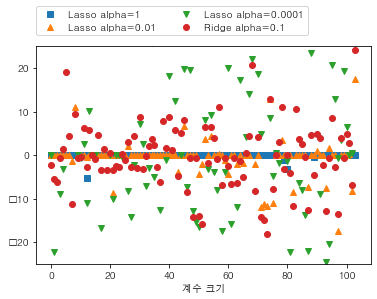

In [82]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.xlabel("계수 크기")

In [86]:
# 로지스텍 선형모델
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름 : {}".format(iris['target_names']))
print("특성의 이름 : {}".format(iris['feature_names']))
X = iris['data'][:,3:]
print(X.shape)
Y = (iris["target"] == 2).astype(np.int)
print(Y.shape)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름 : ['setosa' 'versicolor' 'virginica']
특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


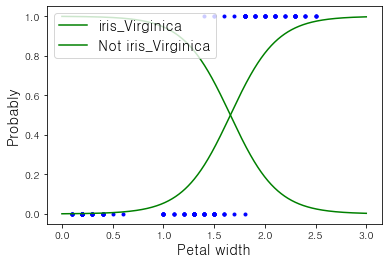

In [88]:
log_reg = LogisticRegression()
log_reg.fit(X, Y)

# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정확률
X_new = np.linspace(0, 3 , 1000).reshape(-1, 1)
Y_proba = log_reg.predict_proba(X_new)

plt.plot(X, Y, "b.")
plt.plot(X_new, Y_proba[:,1], "g-", label="iris_Virginica")
plt.plot(X_new, Y_proba[:,0], "g-", label="Not iris_Virginica")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probably", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


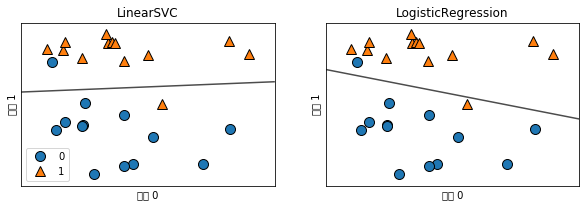

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import mglearn

X, Y = mglearn.datasets.make_forge()

flag, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes) : 
    clf = model.fit(X, Y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax = ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], Y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 42)
log_reg = LogisticRegression(max_iter=5000).fit(X_train, Y_train)

print("훈련 세트 예측 : {:.3f}".format(log_reg.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.3f}".format(log_reg.score(X_test, Y_test)))

훈련 세트 예측 : 0.958
테스트 세트 R^2 : 0.958


In [15]:
log_reg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, Y_train)

print("훈련 세트 예측 : {:.3f}".format(log_reg100.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.3f}".format(log_reg100.score(X_test, Y_test)))

훈련 세트 예측 : 0.984
테스트 세트 R^2 : 0.965


In [16]:
log_reg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, Y_train)

print("훈련 세트 예측 : {:.3f}".format(log_reg001.score(X_train, Y_train)))
print("테스트 세트 R^2 : {:.3f}".format(log_reg001.score(X_test, Y_test)))

훈련 세트 예측 : 0.953
테스트 세트 R^2 : 0.951


C=0.001 인 ;1 로지스텍 회귀의 훈련 정확도 : 0.91
C=0.001 인 ;1 로지스텍 회귀의 테스트 정확도 : 0.92
C=1.000 인 ;1 로지스텍 회귀의 훈련 정확도 : 0.96
C=1.000 인 ;1 로지스텍 회귀의 테스트 정확도 : 0.96
C=100.000 인 ;1 로지스텍 회귀의 훈련 정확도 : 0.99
C=100.000 인 ;1 로지스텍 회귀의 테스트 정확도 : 0.98


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


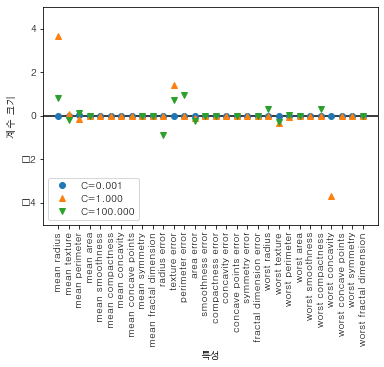

In [20]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family=font_name)

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']) : 
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(X_train, Y_train)
    print("C={:.3f} 인 ;1 로지스텍 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, Y_train)))
    print("C={:.3f} 인 ;1 로지스텍 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test, Y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)